png 
  2

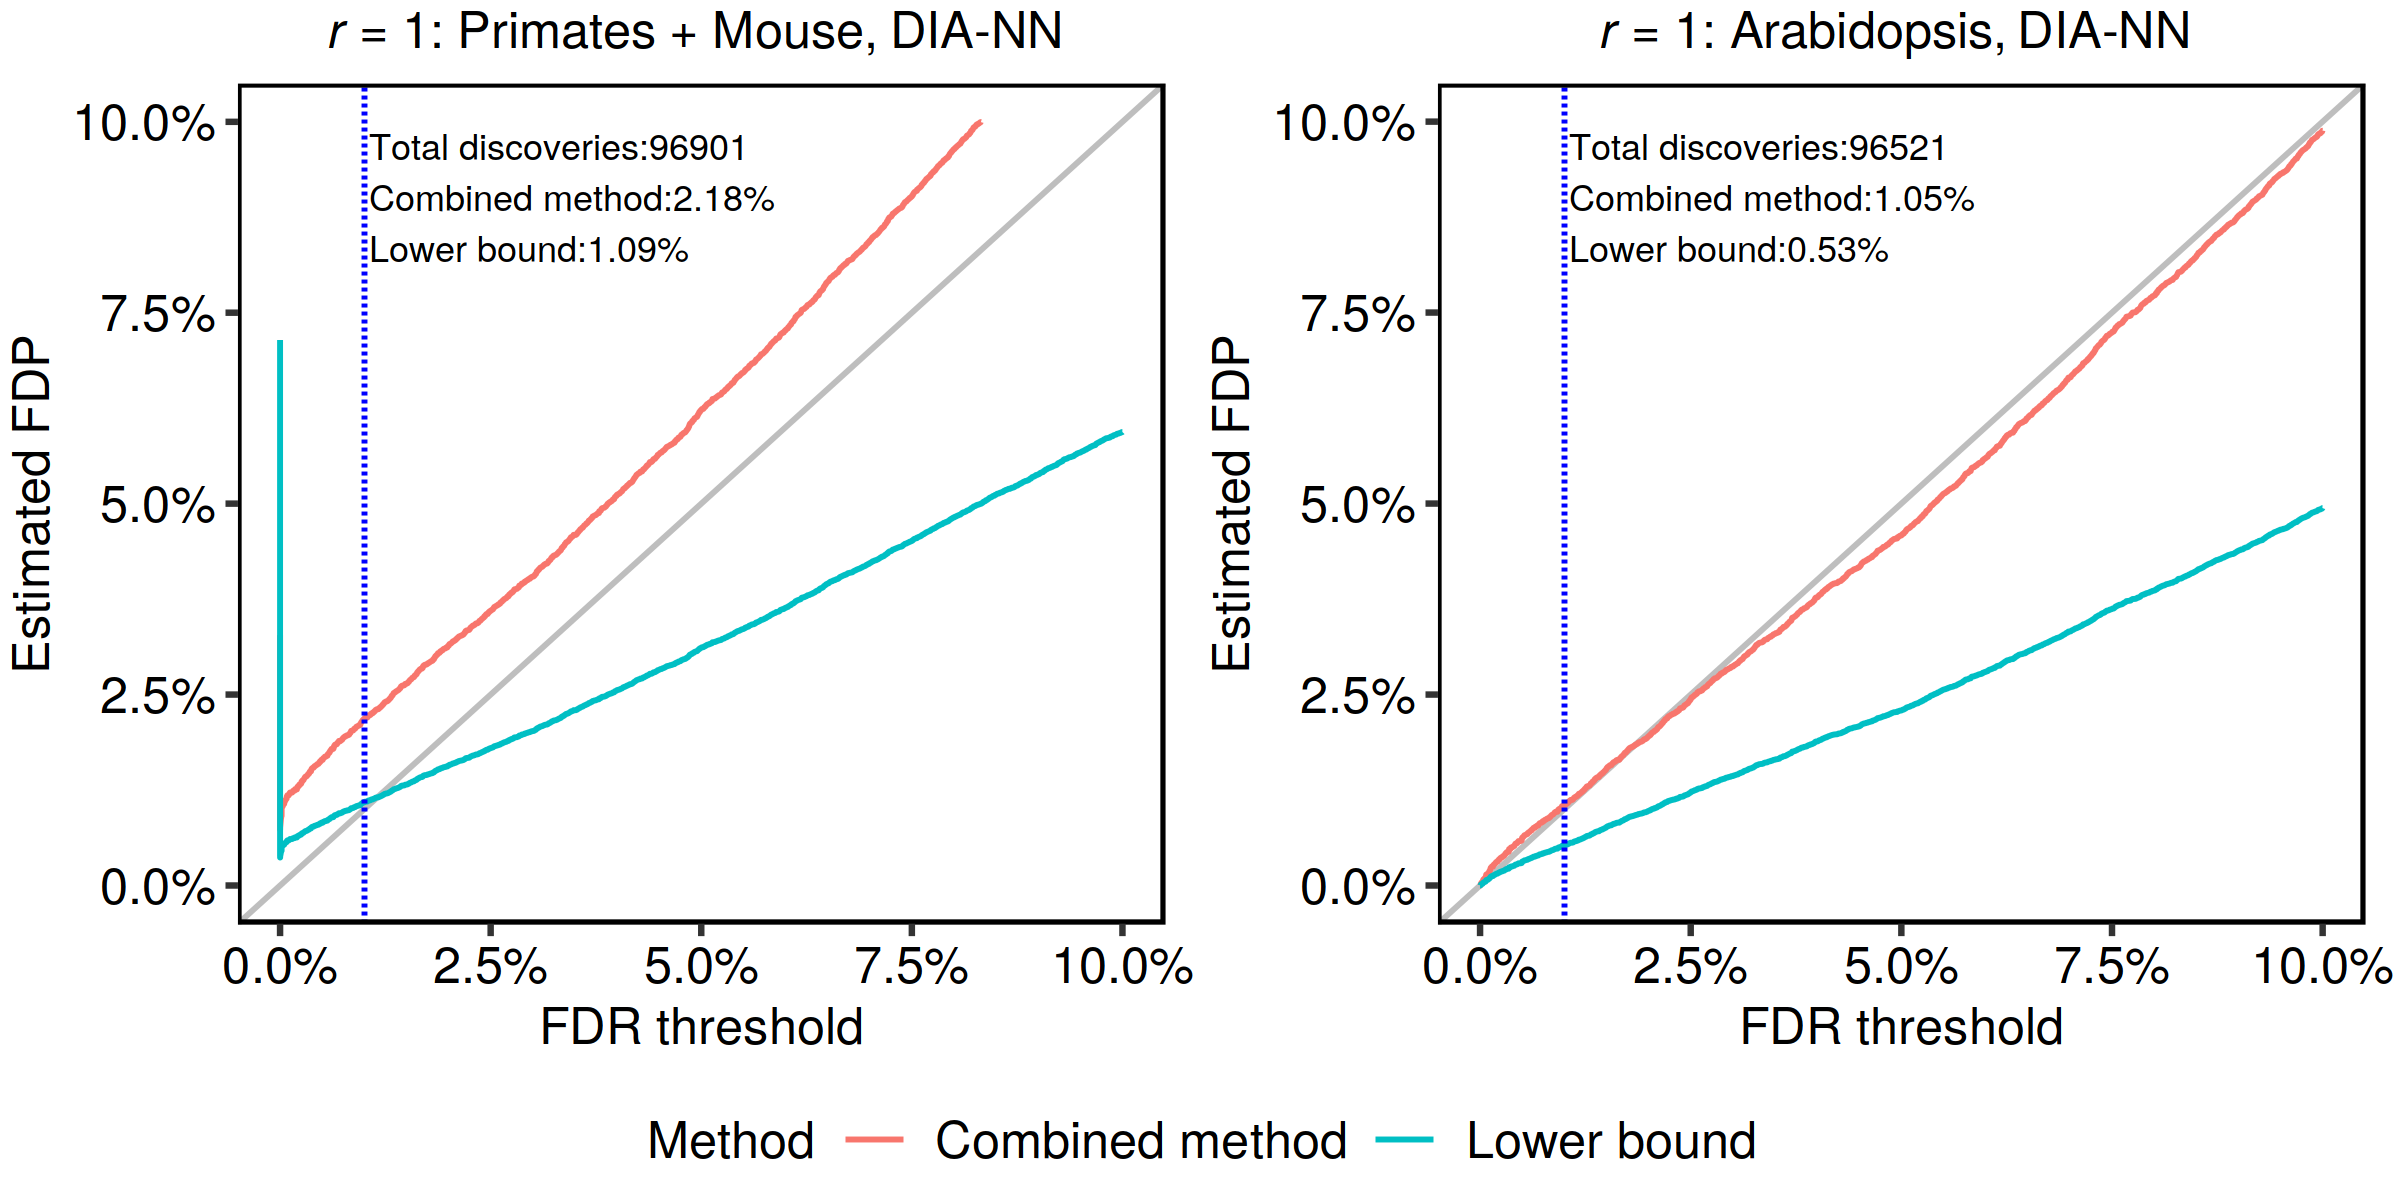

In [1]:
source("/data/scratch/bwen1/project/2023_entrapment_fdr/bin/run_fdp_calc.R")
library(ggtext)
color_mapping <- c("Paired method" = "#7CAE00", "Sample method" = "#C77CFF", "Lower bound" = "#00BFC4", "Combined method" = "#F8766D")
options(repr.plot.width = 4*2, repr.plot.height = 4,repr.plot.res = 200)

fdr_max <- 0.10

report_file <- "./human_20k/results/nf-teirex-dia/diann/report.tsv"
pep_file <- "./human_20k/UP000005640_9606_I2L_4primates_entrapment_peptide_level_pep.txt"
pro_fdp_file_1_fold <- run_diann_fdp_analysis(report_file,level = "precursor",prefix = "precursor",r=1, pep_file=pep_file)
g1 <- plot_fdp_fdr_v2(pro_fdp_file_1_fold,fdr_max = fdr_max,fig_title="<i>r</i> = 1: Primates + Mouse, DIA-NN",add_numbers = TRUE, color_mapping = color_mapping)

report_file <- "./human_80k/results/nf-teirex-dia/diann/report.tsv"
pep_file <- "./human_80k/UP000005640_9606_I2L_4primates_entrapment_peptide_level_pep.txt"
pro_fdp_file_2_fold <- run_diann_fdp_analysis(report_file,level = "precursor",prefix = "precursor",r=1, pep_file=pep_file)
g2 <- plot_fdp_fdr_v2(pro_fdp_file_2_fold,fdr_max = fdr_max,fig_title="<i>r</i> = 1: Primates + Mouse\n(80k human proteins), DIA-NN",add_numbers = TRUE, color_mapping = color_mapping)

report_file <- "./human_20k_distant/results/nf-teirex-dia/diann/report.tsv"
pep_file <- "./human_20k_distant/UP000005640_9606_I2L_Arabidopsis_thaliana_entrapment_peptide_level_pep.txt"
pro_fdp_file_3_fold <- run_diann_fdp_analysis(report_file,level = "precursor",prefix = "precursor",r=1, pep_file=pep_file)
g3 <- plot_fdp_fdr_v2(pro_fdp_file_3_fold,fdr_max = fdr_max,fig_title="<i>r</i> = 1: Arabidopsis, DIA-NN",add_numbers = TRUE, color_mapping = color_mapping)

library(ggpubr)
gg <- ggarrange(g1+theme(plot.title = element_markdown(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                g2+theme(plot.title = element_markdown(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                g3+theme(plot.title = element_markdown(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                ncol=3,nrow=1,font.label = list(size = 12, color = "black", face = "plain"), common.legend = TRUE, legend="bottom",align = "hv")
options(repr.plot.width = 4*3, repr.plot.height = 4*1, repr.plot.res = 300)
print(gg)

## For manuscript
pdf("diann_foreign_species_dist_comparison_diann_precursor_level_two_databases.pdf",width = 3.5*2, height = 3.5)
gg <- ggarrange(g1+theme(plot.title = element_markdown(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                g3+theme(plot.title = element_markdown(size = 12, hjust = 0.5),plot.margin = unit(c(0.1,0.3,0.2,0.1), "cm")),
                ncol=2,nrow=1,font.label = list(size = 12, color = "black", face = "plain"), common.legend = TRUE, legend="bottom",align = "hv")
print(gg)
dev.off()

options(repr.plot.width = 4*2, repr.plot.height = 4*1, repr.plot.res = 300)
print(gg)


